### Simple Linear Regression

Predict a response using a single feature (linear relation between two variables)

#### Regression Line - Line which fits best

$ h(x_i) = \beta_0 + \beta_1x_i $

Need to find regression coefficients $\beta_0$ and $\beta_1$ 

#### Use Least Squares technique

$ y_i = \beta_0 + \beta_1x_i + \epsilon_i = h(x_i) + \epsilon_i \Rightarrow \epsilon_i = y_i - h(x_i) $

#### Squared Error or Cost function: J

$ J(\beta_0, \beta_1) = \frac{1}{2n}\Sigma^n_{i=1}\epsilon^2_i $

$ \beta_1 = \frac{SS_{xy}}{SS_{xx}} $

$ \beta_0 = \bar{y} - \beta_1\bar{x} $

$ SS_{xy} = \Sigma^n_{i=1} (x_i - \bar{x})(y_i - \bar{y}) = \Sigma^n_{i=1} y_ix_i - n\bar{x}\bar{y} $

$ SS_{xx} = \Sigma^n_{i=1} (x_i - \bar{x})^2 = \Sigma^n_{i=1} x_i^2 - n(\bar{x})^2 $

In [1]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Estimate the regression coefficients b_0 and b_1
def estimate_coef(x, y):
    # Number of observations/points
    n = np.size(x)
    
    # Mean of x and y vectors
    m_x, m_y = np.mean(x), np.mean(y)
    
    # Calculate cross-deviation and deviation about x
    SS_xy = np.sum(y * x) - n * m_y * m_x
    SS_xx = np.sum(x * x) - n * m_x * m_x
    
    # Calculate regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1 * m_x
    
    return(b_0, b_1)

In [4]:
# Plot the regression line on graphs of scattered points
def plot_regression_line(x, y, b): 
    # Plot actuals points as scatter plot
    plt.scatter(x, y, color="m", marker="o", s=30)
    
    # Predict the response vector
    y_pred = b[0] + b[1] * x
    
    # Plot the regression line
    plt.plot(x, y_pred, color="g")
    
    # Add labels
    plt.xlabel('x')
    plt.ylabel('y')
    
    # Show plot
    plt.show()

In [5]:
# Calculate regression line given single feature and response vector
def main():
    # Observations
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
    
    # Estimate Coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {} \nb_1 = {}". format(b[0], b[1]))
    
    # Plot regression line
    plot_regression_line(x, y, b)

Estimated coefficients:
b_0 = 1.2363636363636363 
b_1 = 1.1696969696969697


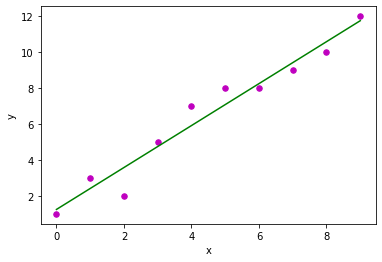

In [6]:
main()

### Multiple Linear Regression

Model the relationship between **two or more features**

Uses a dataset of **n** rows with **p** features/independent variables and one response

X (feature matrix) = a matrix of size **n x p** where $x_{ij}$ denotes the $j^{th}$ feature for the $i^{th}$ observation

y (response vector) = a vector of size **n** where $y_i$ denotes the value of response for the $i^{th}$ observation

#### Regression line for *p* features

$h(x_i) = \beta_0 + \beta_1x_{i1} + ... + \beta_px_{ip}$, where $h_i$ is **predicted response value** for the $i^{th}$ observation

$y_i = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_px_{ip} + \epsilon_i = h(x_i) + \epsilon_i \Rightarrow \epsilon_i = y_i - h(x_i)$, where $\epsilon_i$ represents the **residual error**


#### Linear model in terms of matrices

$y = X\beta + \epsilon$, where

$X = \begin{bmatrix} 1 & x_{11} & \cdots & x_{1p} \\ 
    1 & x_{21} & \cdots & x_{2p} \\
    \vdots & \vdots & \ddots & \vdots \\
    1 & x_{n1} & \cdots & x_{np} \end{bmatrix}$,

$\beta = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_p \end{bmatrix}$,

$\epsilon = \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_n \end{bmatrix}$

### Estimate $\beta$ using Least Square method

Determine $\beta'$ by minimizing total residual error

$\hat{\beta} = (X'X)^{-1}X'y$, where ' is transpose and -1 is matrix inverse

Therefore, $\hat{y} = X\hat{\beta}$, where $\hat{y}$ is the **estimated response vector**

Coefficients: 
 [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]
Variance score: 0.720905667266179


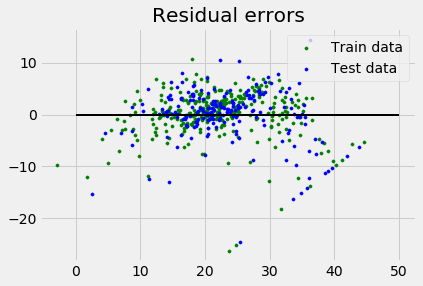

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

# Load the Boston dataset
boston = datasets.load_boston(return_X_y=False)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.4, random_state=1)

# Create linear regression object
reg = linear_model.LinearRegression()

# Train the model using training sets
reg.fit(X_train, y_train)

# Regression coefficients
print('Coefficients: \n', reg.coef_)

# Variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# Plot for residual error
plt.style.use('fivethirtyeight')

plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color="green", s=10, label="Train data")
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color="blue", s=10, label="Test data")

plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)
plt.legend(loc="upper right")
plt.title("Residual errors")
plt.show()